In [1]:
import chardet #detect the text encoding

# Detect encoding
with open("IMDb Movies India.csv", "rb") as f:
    result = chardet.detect(f.read(100000))  # read first 100 KB
    print(result)


{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


## Task 1: Reading and Exploration

At first, the CSV file could not be loaded because it was not in **UTF-8 encoding**.  
To solve this, we used the `chardet` library to check the correct encoding of the file.  

The result showed that the file is in **ISO-8859-1 encoding**.  
So, while reading the file with Pandas, we specified `encoding="ISO-8859-1"`.  

This allowed us to successfully load the dataset into a DataFrame for further analysis.


- ### Subtask 1.1: Importing Libraries

In [2]:
import pandas as pd #used for data handling
import numpy as np #used for numerical operations
import matplotlib.pyplot as plt # used for plots
import seaborn as sns #used for advanced plots

- ### Subtask 1.2: Import dataset and read

In [3]:
# Load with detected encoding
df = pd.read_csv("IMDb Movies India.csv", encoding="ISO-8859-1")
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


## Task 2: Exploratory Data Analysis (EDA)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


#### Note:
- Total rows: **15,509**
- Total columns: **10**
- Most columns are stored as **object (string)** type.
- `Rating` is the only numeric column (`float64`).
- `Votes` should be numeric but is stored as string (probably due to commas).
- `Year` is stored as string with brackets → needs cleaning.
- `Duration` is stored as string with "min" → needs conversion to numbers.
- Several columns contain missing values (e.g., `Year`, `Duration`, `Rating`, `Genre`, `Actors`).
- First row looked invalid earlier (junk values).


In [5]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

#### Note:
- **Name** → No missing values 
- **Year** → 528 missing values  
- **Duration** → 8,269 missing values (almost all missing)  
- **Genre** → 1,877 missing values  
- **Rating** → 7,590 missing values (almost all missing → this is our target column)  
- **Votes** → 7,589 missing values (almost all missing)  
- **Director** → 525 missing values  
- **Actor 1** → 1,617 missing values  
- **Actor 2** → 2,384 missing values  
- **Actor 3** → 3,144 missing values  

##### Insights:
- `Name` is clean (no missing values).  
- `Duration`, `Rating`, and `Votes` are **almost empty** → not useful.  
- Other columns like `Year`, `Genre`, `Director`, and `Actors` have some missing values but can still be used.  

In [6]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


#### Note:
- The dataset contains **7,919 movies**.
- The **average IMDb rating** is around **5.8**, meaning most movies are rated slightly above average.
- The **median rating** is **6.0**, very close to the mean → ratings are fairly balanced.
- **Most movies fall between 5.0 and 7.0** (the 25th to 75th percentile).
- The **lowest rating** is **1.1** and the **highest is 10**, so the dataset covers the full IMDb rating scale.
- The **standard deviation (1.38)** shows that ratings don’t vary too much; they are tightly clustered around the middle.
- Very few movies have **extremely low or perfect scores** → IMDb ratings are generally concentrated in the middle range.



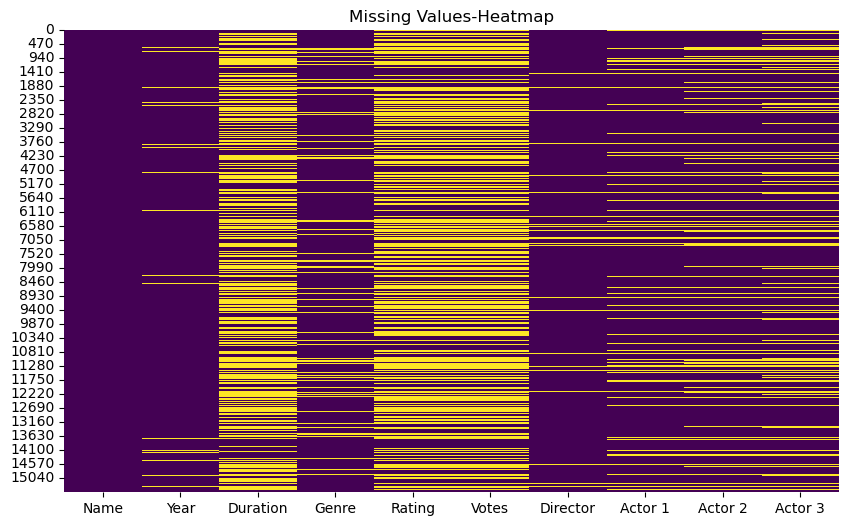

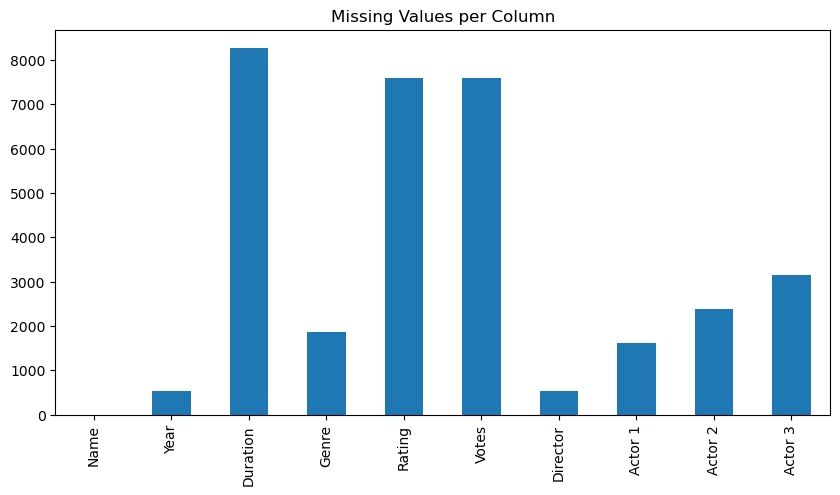

In [7]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values-Heatmap")
plt.show()

df.isnull().sum().plot(kind='bar', figsize=(10,5), title="Missing Values per Column")
plt.show()                      

#### Note:
- Use the bar chart to compare missing values across columns.
- Use the heatmap to spot patterns row by row.

## Task 3: Data Cleaning (Preprocessing).

In [8]:
# Drop columns that are almost fully missing
df = df.drop(columns=['Duration', 'Votes'])

# Drop rows where target (Rating) is missing
df = df.dropna(subset=["Rating"])

# Fill missing values in categorical columns with "Unknown"
for col in ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']:
    df[col] = df[col].fillna('Unknown')

# Fill missing Year with 0
df['Year'] = df['Year'].fillna(0)

df.isnull().sum()

Name        0
Year        0
Genre       0
Rating      0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

#### Note:
- Dropped columns **`Duration`** and **`Votes`** because they had too many missing values.  
- Dropped rows with missing **`Rating`** (target variable).  
- Filled missing values in categorical columns (`Genre`, `Director`, `Actor 1`, `Actor 2`, `Actor 3`) with **"Unknown"**.  
- Filled missing **`Year`** with **0**.  
- After cleaning, there are **no missing values left** in the dataset.  




In [9]:
print(df.columns.tolist()) # Current existing columns

['Name', 'Year', 'Genre', 'Rating', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']


## Task 4: Understand Target Variable (Rating)
- Check if ratings are normally distributed or skewed.

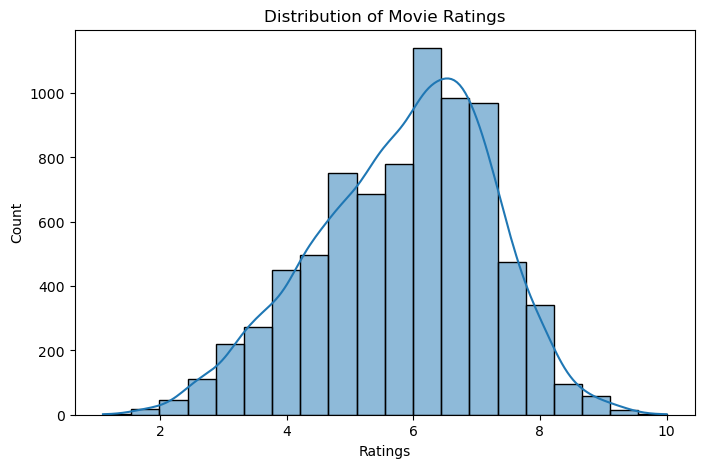

In [10]:
plt.figure(figsize=(8,5))
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title("Distribution of Movie Ratings")
plt.xlabel("Ratings")
plt.ylabel("Count")
plt.show()

#### Note:
- Most movie ratings lie between **4 and 8**.  
- The **peak** is around **6–7**, meaning the majority of movies are rated average to slightly above average.  
- Very few movies are rated **below 3** or **above 9** → extreme ratings are rare.  
- The distribution is **roughly bell-shaped**, but slightly **left-skewed**, showing more average movies than excellent ones.  


## Task 5: Analyzing Genres
- Genres help us understand **movie distribution** (which types are most common).  
- They reveal **audience preferences** and trends.  
- By checking average ratings, we can see **which genres perform better** on IMDb.  

- ### Subtask 5.1: Top 10 Movie Genres by Count


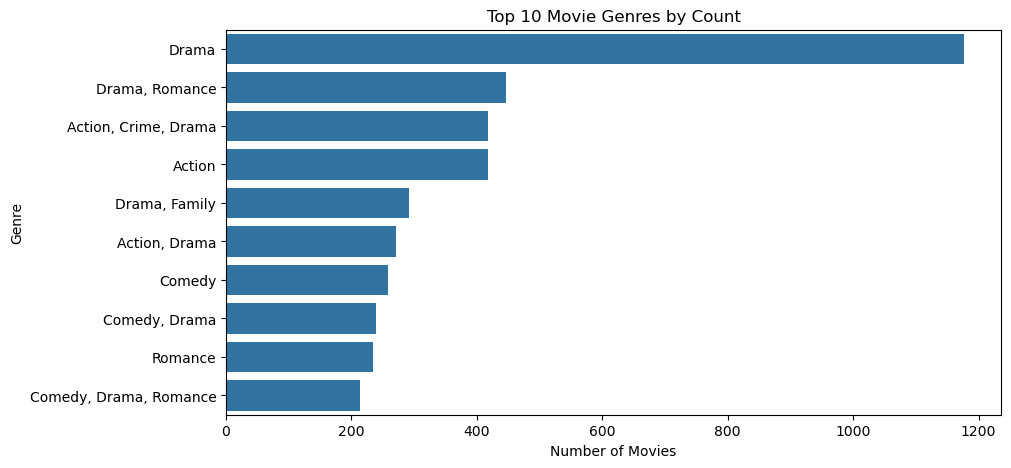

In [11]:
plt.figure(figsize=(10,5))

sns.countplot( # Creates a bar plot for categorial data
    y=df['Genre'], # Puts genres on Y-axis (horizontal bars)
    order=df['Genre'].value_counts().index[:10]) # Only top 10 most frequent genres
plt.title("Top 10 Movie Genres by Count")
plt.xlabel("Number of Movies")
plt.ylabel("Genre")
plt.show()

#### Note:

- **Drama** is the most dominant genre, appearing in the highest number of movies.  
- Genre combinations like **Drama + Romance** and **Action + Crime + Drama** are also very common.  
- **Comedy** and **Romance** are popular but often combined with Drama.  
- Suggests that Drama is a central element in most films, often blended with other genres.  


### Subtask 5.2: Average Ratings by Genre

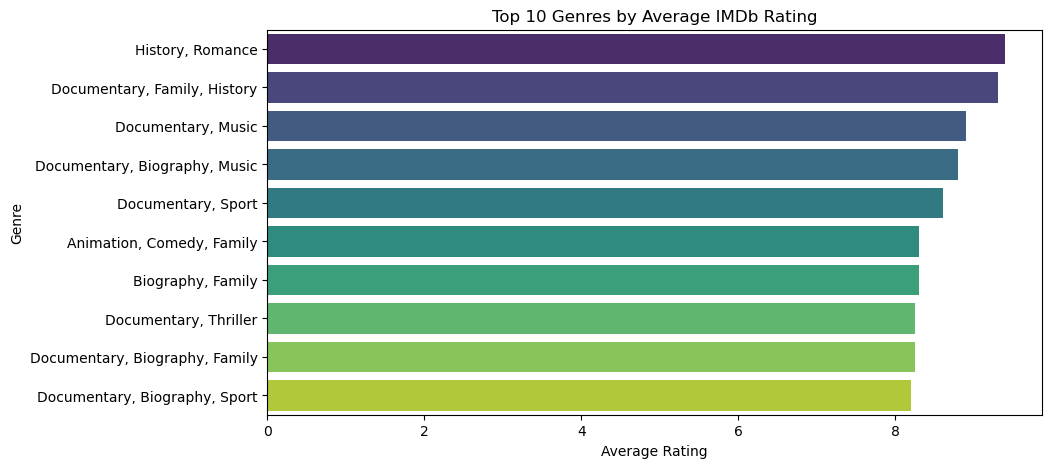

In [12]:
# Calculate average rating per genre
genre_ratings = df.groupby("Genre")["Rating"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=genre_ratings.values,
            y=genre_ratings.index,
            hue=genre_ratings.index,
            dodge=False, legend=False,
            palette="viridis")
plt.title("Top 10 Genres by Average IMDb Rating")
plt.xlabel("Average Rating")
plt.ylabel("Genre")
plt.show()

#### Note:
- Some genres, though less frequent, achieve **higher audience ratings**.  
- Highlights the **quality-oriented genres** compared to just popularity.  
- Provides a different perspective than the countplot — focusing on **viewer satisfaction** rather than number of movies.  

### Subtask 5.3: Average Ratings by Year

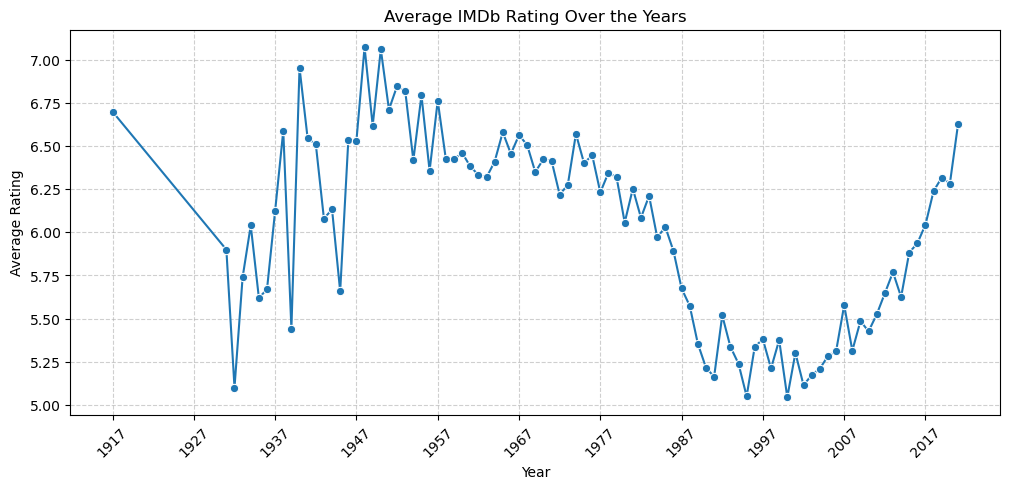

In [13]:
# Clean year column just once
df["Year"] = df["Year"].astype(str).str.extract(r'(\d{4})').astype(int)

# Compute and plot
year_ratings = df.groupby("Year")["Rating"].mean()

plt.figure(figsize=(12,5))
sns.lineplot(x=year_ratings.index, y=year_ratings.values, marker="o")
plt.title("Average IMDb Rating Over the Years")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.grid(True, linestyle="--", alpha=0.6)
plt.xticks(range(year_ratings.index.min(), year_ratings.index.max()+1, 10), rotation=45)
plt.show()


#### Note:
- **1910s–1930s:** Highly unstable ratings, showing inconsistent audience reception.  
- **1940s–1960s:** Strong growth phase; many years average above **6.5–7.0**, suggesting a golden era.  
- **1970s–2000s:** Gradual decline, bottoming near **5.0–5.2** in the late 1990s.  
- **Post-2010:** Clear recovery trend, with ratings steadily climbing again.  
- Overall, the plot highlights **cyclical shifts in cinema quality and audience preferences** across decades.  

### Subtask 5.4: Number of Movies Released Per Year

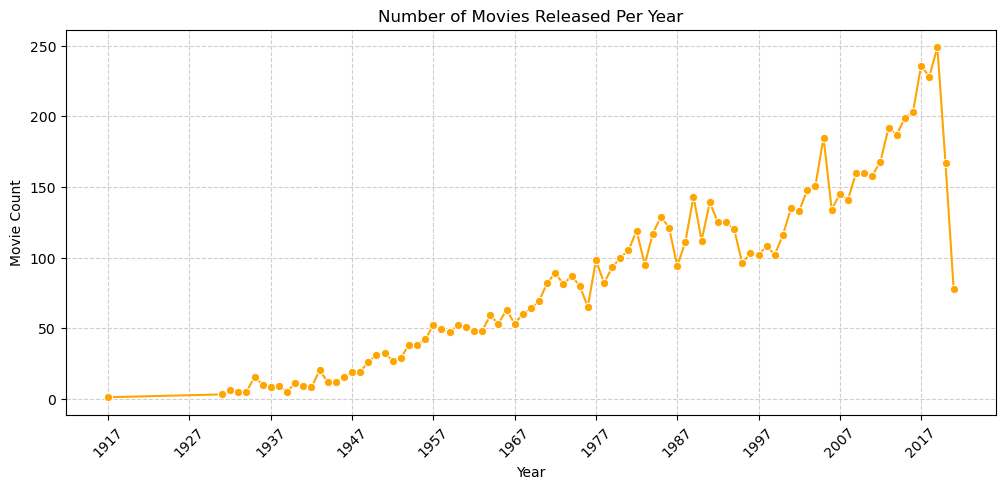

In [14]:
# Count of movies released per year
movies_per_year = df.groupby("Year").size()

plt.figure(figsize=(12,5))
sns.lineplot(x=movies_per_year.index,
             y=movies_per_year.values,
             marker="o",
             color="orange")

plt.title("Number of Movies Released Per Year")
plt.xlabel("Year")
plt.ylabel("Movie Count")
plt.grid(True, linestyle="--", alpha=0.6)
plt.xticks(range(movies_per_year.index.min(), 
                 movies_per_year.index.max()+1, 10), 
           rotation=45)

plt.show()


#### Note: 
- **1910s–1940s:** Very few movies produced; cinema industry was in its early stages.  
- **1950s–1970s:** Steady growth in production, reflecting expansion of the film industry.  
- **1980s–1990s:** Significant rise with periodic peaks, indicating global cinema boom.  
- **2000s–2010s:** Sharp surge in production, driven by globalization, digital filmmaking, and streaming platforms.  
- **Post-2019 Dip:** Sudden decline, likely due to global events or maybe due to incomplete data (e.g., pandemic, incomplete dataset).  

### Subtask 5.5: Average Rating per Director

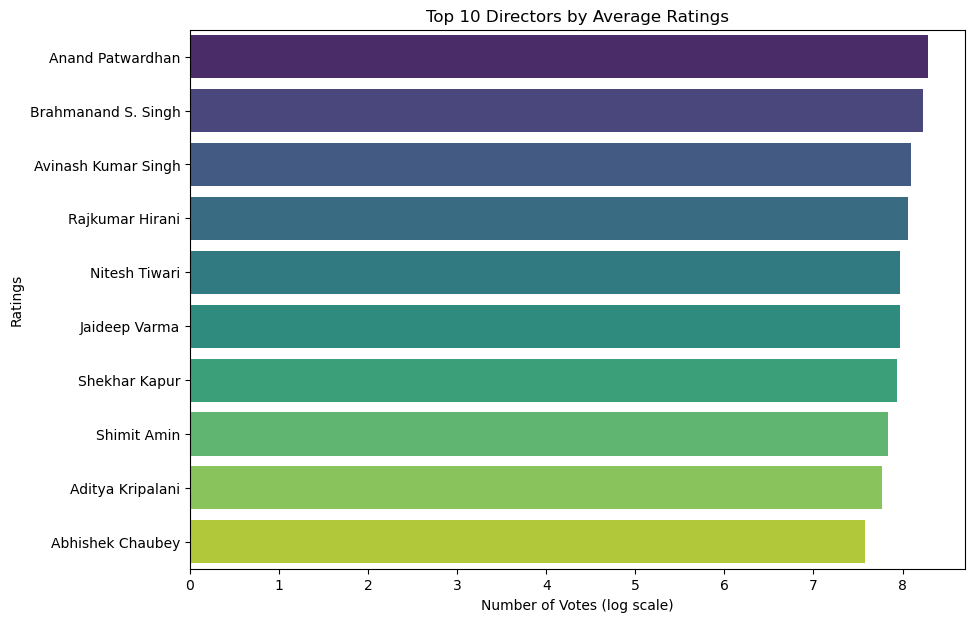

In [15]:
director_ratings = df.groupby("Director")["Rating"].mean()
top_directors = director_ratings[df["Director"].value_counts() > 2].sort_values(ascending=False).head(10)

plt.figure(figsize=(10,7))
sns.barplot(x=top_directors.values,
            y=top_directors.index,
            hue=top_directors.index,
            dodge=False,
            legend=False,
            palette="viridis"
           )

plt.title("Top 10 Directors by Average Ratings")
plt.xlabel("Number of Votes (log scale)")
plt.ylabel("Ratings")
plt.show()

#### Note:
- **Anand Patwardhan** and **Brahmanand S. Singh** are the top-rated directors, with very high average scores.  
- Popular filmmakers like **Rajkumar Hirani** and **Nitesh Tiwari** also rank among the best.  
- All directors in the top 10 maintain an **average rating above 7.5**, showing strong consistency.  

### Subtask 5.6: Average Rating per Actor

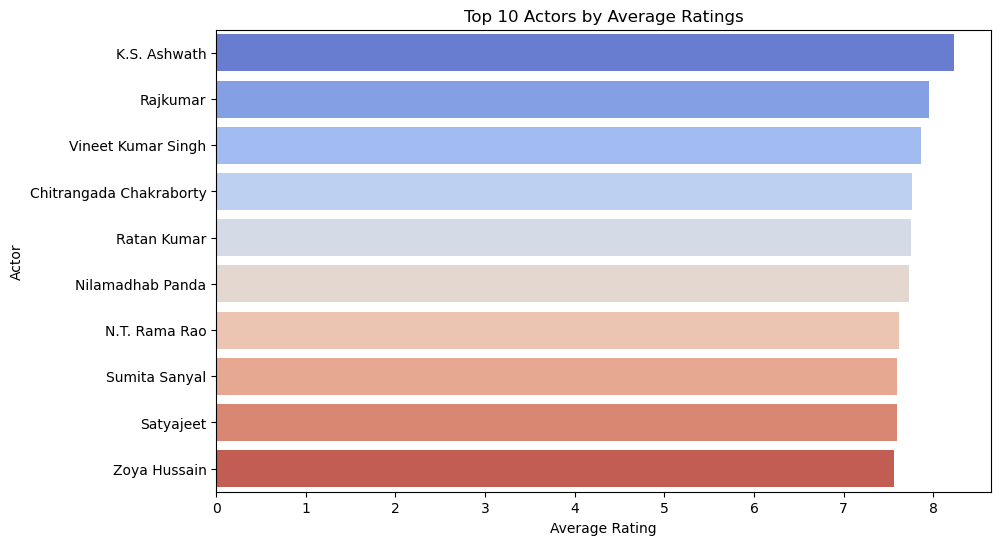

In [16]:
# Combine Actor 1, Actor 2, and Actor 3 into a single column
actors = pd.melt(df,
                id_vars=["Name", "Year", "Genre", "Rating", "Director"],
                value_vars=["Actor 1", "Actor 2", "Actor 3"],
                var_name="Actor_Position",
                value_name="Actor")

# Grouping Actor's and Calculate their average ratings
actor_ratings = actors.groupby("Actor")["Rating"].mean()

# Count number of movies per actor
actor_counts = actors["Actor"].value_counts()

# Filter actors with at least 3 movies
qualified_actors = actor_counts[actor_counts >= 3].index
actor_ratings = actor_ratings.loc[qualified_actors]

# Get Top 10 actors by average rating
top_actors = actor_ratings.sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_actors.values,
            y=top_actors.index,
            hue=top_actors.index,
            dodge=False,
            legend=False,
            palette="coolwarm")
plt.title("Top 10 Actors by Average Ratings")
plt.xlabel("Average Rating")
plt.ylabel("Actor")
plt.show()

#### Note:
- **K.S. Ashwath** holds the top spot with the **highest average rating**, showing strong audience appreciation.  
- **Rajkumar** and **Vineet Kumar Singh** follow closely, maintaining very high consistency in ratings.  
- **Chitrangada Chakraborty** and **Ratan Kumar** are also among the top performers, proving their movies are well-received.  
- The list includes both **veteran actors** (e.g., Rajkumar, N.T. Rama Rao) and **contemporary ones** (e.g., Zoya Hussain, Vineet Kumar Singh).  
- All top 10 actors have managed to keep their **average rating near or above 7.5**, showing **quality over quantity** in their filmography.  


 ### Subtask 5.7: Top 10 Genre Popularity Over Time

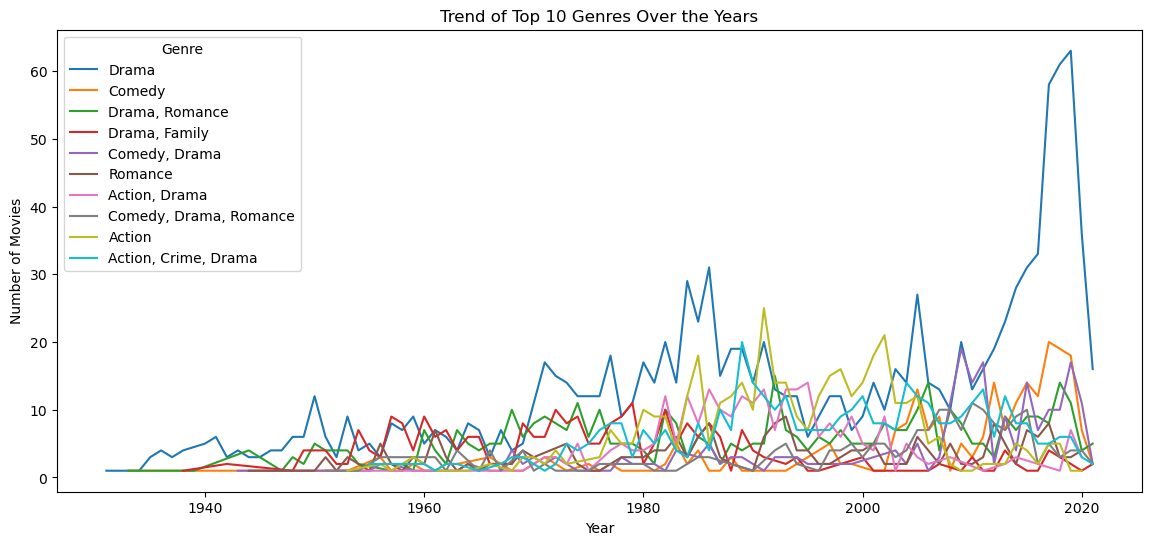

In [17]:
# Count total movies per genre
top_genres = df["Genre"].value_counts().head(10).index

# Filter only those genres
genre_trend = df[df["Genre"].isin(top_genres)].groupby(["Year", "Genre"])["Name"].count().reset_index()

# Plot
plt.figure(figsize=(14,6))
sns.lineplot(data=genre_trend, x="Year", y="Name", hue="Genre")
plt.title("Trend of Top 10 Genres Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.show()


#### Note:

1. **Drama is the king**  
   - Drama movies have always been the most common.  
   - After 2000, drama movies grew very fast and peaked around 2018–2019.

2. **Comedy and Action are steady players**  
   - Comedy slowly grew, especially after the 1990s.  
   - Action movies became popular after the 1980s and kept growing.

3. **Romance is going down**  
   - Romance and "Drama + Romance" were strong earlier (1950s–1970s).  
   - After 2000, fewer pure romance movies are made.

4. **Mix of genres is rising**  
   - Movies with combined genres like *Comedy + Drama* or *Action + Drama* are more common now.  
   - Shows filmmakers want to attract wider audiences.

5. **1980s to 2000s = more variety**  
   - Different genres started appearing, not just drama and romance.  
   - Indian cinema explored more storytelling styles.

6. **2010 to 2020 = Drama dominates again**  
   - Drama became very strong.  
   - Action and Comedy also got bigger share, but Romance declined.

---
**Insight:** Drama has always been the backbone of Indian movies. Over time, Action and Comedy gained popularity, while Romance declined. Today, most movies mix multiple genres.


### Task 6: Feature Engineering and Correlation Analysis
 - #### Subtask 6.1: Convert Categorical Features to Numerical

In [18]:
from sklearn.preprocessing import LabelEncoder

# Create a copy to keep the original DataFrame intact
df_encoded = df.copy()

# Initialize the encoder
le = LabelEncoder()

# List of columns to encode
categorical_cols = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Name']

# Apply Label Encoding to each categorical column
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

df_encoded.head()

,Name,Year,Genre,Rating,Director,Actor 1,Actor 2,Actor 3
1,0,2019,268,7.0,811,1782,2815,377
3,1,2019,207,4.4,1749,1589,890,2572
5,4,1997,177,4.7,2005,508,85,2449
6,5,2005,331,7.4,2643,931,1388,3030
8,92,2012,367,5.6,174,2521,1461,1205


#### Subtask 6.1: Plotting Heatmap

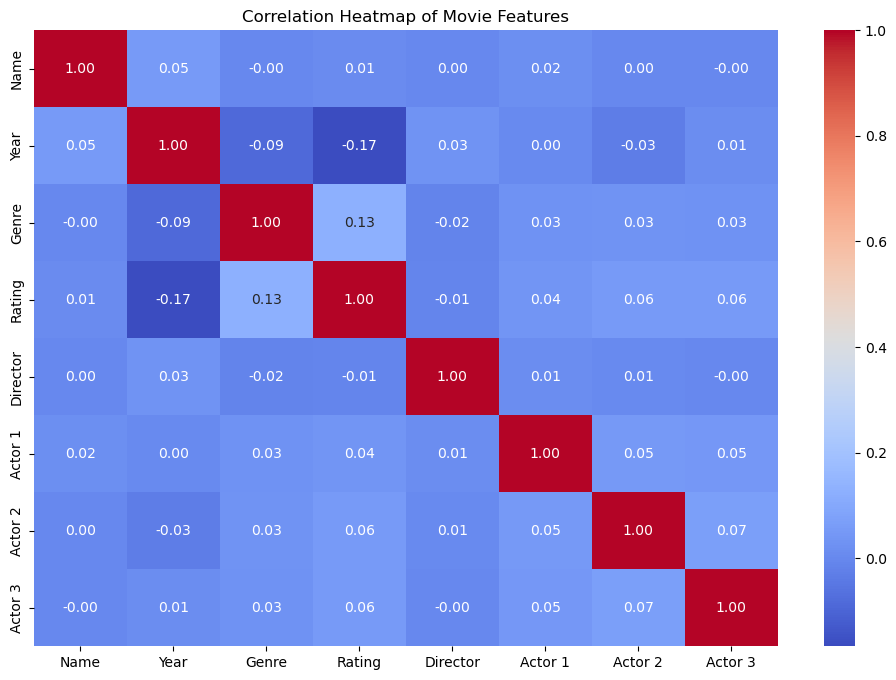

In [19]:
# Calculate the correlation matrix
corr_matrix = df_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Movie Features")
plt.show()

#### Note:

1. **Weak Correlations with Rating**
   - Most features (Director, Actors, Genre, Year) show **very weak correlation** with `Rating` (values close to 0).
   - The highest observed correlation with `Rating` is only **0.13 (Genre)**, which is still weak.

2. **Year and Rating**
   - `Year` has a **negative correlation (-0.17)** with `Rating`, suggesting that **newer movies may tend to have slightly lower ratings**.  
   - However, this relationship is weak and may not generalize.

3. **Actors and Director**
   - `Actor 1`, `Actor 2`, `Actor 3`, and `Director` have **almost no correlation** with each other or with `Rating`.
   - This indicates that **individual names don’t directly influence ratings** in a linear correlation sense.

4. **Genre**
   - `Genre` shows a **small positive correlation (0.13)** with `Rating`.
   - Certain genres may have slightly higher ratings, but the effect is minor.

5. **Name**
   - `Name` has no meaningful correlation (≈0 with all features).  
   - This is expected since movie titles are identifiers and don’t carry numeric relationships.

---

#### Insights:
- No feature shows **strong correlation** with `Rating`.  
- This means **simple linear models may not perform well** using only raw categorical encodings.  
- We’ll likely need:
  - **Feature engineering** (e.g., extracting decade from `Year`, counting actor/director popularity, or encoding genres better).
  - **Non-linear models** (like Random Forest or XGBoost) to capture hidden patterns.


### Task 7: Feature Engineering

In [20]:
from sklearn.preprocessing import MultiLabelBinarizer

# Create Decade
df["Decade"] = (df["Year"] // 10) * 10


In [21]:
# Encode Genre
df["Genre"] = df["Genre"].str.split(",")

In [22]:
# Multi-label binarizer for genres
mlb = MultiLabelBinarizer()
genre_encoded = mlb.fit_transform(df["Genre"])

In [23]:
# Convert to DataFrame
genre_df = pd.DataFrame(genre_encoded, columns=mlb.classes_, index=df.index)

In [24]:
# Concatenate with main df
df = pd.concat([df, genre_df], axis=1)
print("New Column added:\n", genre_df.columns.tolist()[:10],"...")
df.head()

New Column added:
 [' Action', ' Adventure', ' Biography', ' Comedy', ' Crime', ' Drama', ' Family', ' Fantasy', ' History', ' Horror'] ...


,Name,Year,Genre,Rating,Director,Actor 1,Actor 2,Actor 3,Decade,Action,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,Unknown,War
1,#Gadhvi (He thought he was Gandhi),2019,[Drama],7.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,2010,0,...,0,0,0,0,0,0,0,0,0,0
3,#Yaaram,2019,"[Comedy, Romance]",4.4,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,2010,0,...,0,0,0,0,0,0,0,0,0,0
5,...Aur Pyaar Ho Gaya,1997,"[Comedy, Drama, Musical]",4.7,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,1990,0,...,0,0,0,0,0,0,0,0,0,0
6,...Yahaan,2005,"[Drama, Romance, War]",7.4,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,2000,0,...,0,0,0,0,0,0,0,0,0,0
8,?: A Question Mark,2012,"[Horror, Mystery, Thriller]",5.6,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,2010,0,...,1,0,0,0,0,0,0,0,0,0


In [25]:
df.columns

Index(['Name', 'Year', 'Genre', 'Rating', 'Director', 'Actor 1', 'Actor 2',
       'Actor 3', 'Decade', ' Action', ' Adventure', ' Biography', ' Comedy',
       ' Crime', ' Drama', ' Family', ' Fantasy', ' History', ' Horror',
       ' Music', ' Musical', ' Mystery', ' News', ' Romance', ' Sci-Fi',
       ' Sport', ' Thriller', ' War', ' Western', 'Action', 'Adventure',
       'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'Unknown', 'War'],
      dtype='object')

### Feature Engineering: Decade & Genre Encoding
#### 🔹 What we did?
1. **Created `Decade` Feature**
   - Extracted the decade from the `Year` column.  
   - Example: 2019 → `2010`, 1997 → `1990`.  
   - This groups movies by broader time periods, reducing noise from individual years.
2. **Encoded `Genre` with MultiLabelBinarizer**
   - Split multi-genre strings (e.g., `"Comedy, Drama, Musical"`) into lists.  
   - Applied **multi-label one-hot encoding** to create a binary column for each genre.  
   - Example:  
     - A movie with `["Comedy", "Romance"]` → `Comedy = 1`, `Romance = 1`, all other genres = 0.  

### 🔹 Why we did this?
- Raw categorical data like **Year** and **Genre** are not directly useful for modelling.  
- We need to **transform them into numerical features** that capture patterns in the data.  
- This helps models better understand **time trends** and **genre effects** on movie ratings.  

### 🔹 What we got?
- Added a new **`Decade` column**.  
- Expanded the dataset with **~40+ new genre columns** (e.g., `Comedy`, `Drama`, `Horror`, `Romance`, etc.).  
- Final dataset shape: **15,509 rows × 50 columns**. 

### Task 8: Data Splitting
- #### Training Set: This is the data that the model will learn from.
- #### Testing Set: This data is used to evaluate the model after it has been trained.

In [26]:
from sklearn.model_selection import train_test_split

# Perform one-hot encoding on the 'Genre' column.
genre_dummies = df['Genre'].str.get_dummies(sep=', ')
df_encoded = pd.concat([df, genre_dummies], axis=1)

# Create the final DataFrame for the model, dropping all non-numeric columns.
df_model = df_encoded.drop(columns=[
    'Name', 'Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Year', 'Duration'
], errors='ignore')

# Define features (X) and target (y).
X = df_model.drop('Rating', axis=1)
y = df_model['Rating']

# Split the clean data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Overview of the Train & Test data
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (6335, 118)
X_test shape: (1584, 118)
y_train shape: (6335,)
y_test shape: (1584,)


### Task 9: Model Training

In [28]:
from sklearn.ensemble import GradientBoostingRegressor

# 1. Initialize the model with the best parameters we found
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
print("Training the Gradient Boosting model...")
gb_model.fit(X_train, y_train)
print("Training complete.")

# Make predictions on the test data
print("\nMaking predictions on the test set...")
y_pred = gb_model.predict(X_test)

Training the Gradient Boosting model...
Training complete.

Making predictions on the test set...


### Task 10: Model Evaluation

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"\nModel Performance:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


Model Performance:
Mean Absolute Error (MAE): 0.9436
Root Mean Squared Error (RMSE): 1.2013


### Task 10.1: Actual vs. Predicted Ratings Plot

Text(0.5, 1.0, 'Actual vs. Predicted Movie Ratings')

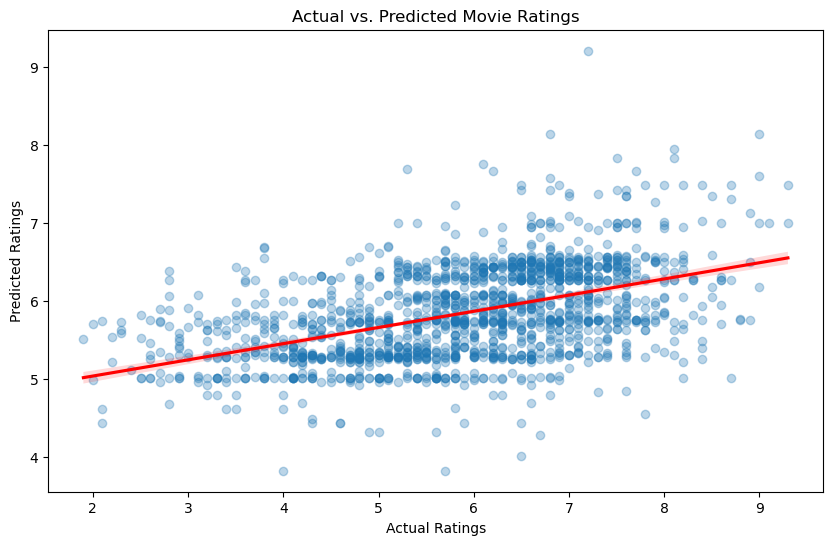

In [30]:
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs. Predicted Movie Ratings")